# OpenCV facial landmark detection
In this notebook we detect facial landmarks with dlib and opencv.

## Imports
Includes our own libraries

In [1]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

In [2]:
import os
import sys
module_path = os.path.abspath(os.path.join('..'))
if module_path not in sys.path:
    sys.path.append(module_path)

from lib.imageutil import show_image

## dlib preparations
We can download a trained facial landmark detector from: http://dlib.net/files/shape_predictor_68_face_landmarks.dat.bz2

In [3]:
#!wget http://dlib.net/files/shape_predictor_68_face_landmarks.dat.bz2 -P ./tmp/
#!bzip2 -dk ./tmp/shape_predictor_68_face_landmarks.dat.bz2

## Landmark detection with pretrained model

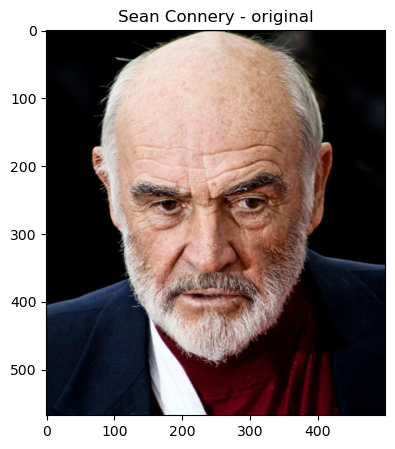

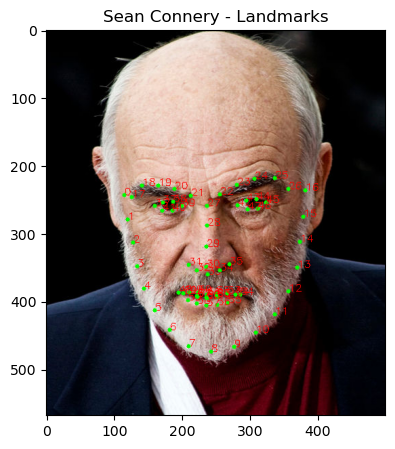

In [13]:
import dlib

predictor = dlib.shape_predictor('./tmp/shape_predictor_68_face_landmarks.dat')
detector = dlib.get_frontal_face_detector()

def get_landmarks(image):
    rects = detector(image, 1)
    if len(rects) > 1:
        raise "Too many faces detected"
    if len(rects) == 0:
        raise "No faces detected"

    return np.matrix([[p.x, p.y] for p in predictor(image, rects[0]).parts()])

def annotate_landmarks(image, landmarks):
    image = image.copy()
    for idx, point in enumerate(landmarks):
        pos = (point[0, 0], point[0, 1])
        cv2.putText(image, str(idx), pos, fontFace=cv2.FONT_HERSHEY_SCRIPT_SIMPLEX, fontScale=0.5, color=(0, 0, 255))
        cv2.circle(image, pos, 3, color=(0, 255, 0), thickness=-1)
    return image

image = cv2.imread('./tmp/wiki/09/26709_1930-08-25_2008.jpg')
show_image(image, 'Sean Connery - original')
landmarks = get_landmarks(image)
image_with_landmarks = annotate_landmarks(image, landmarks)
show_image(image_with_landmarks, 'Sean Connery - Landmarks')